Vir financial gains moet jy deur baie weerstand werk om gains te maak:  
Entropy -> Inertia -> Activation Energy (Endothermism)  
Inflation (Competition) -> Status Quo (Apathy) -> Tax (Opportunity Cost)  

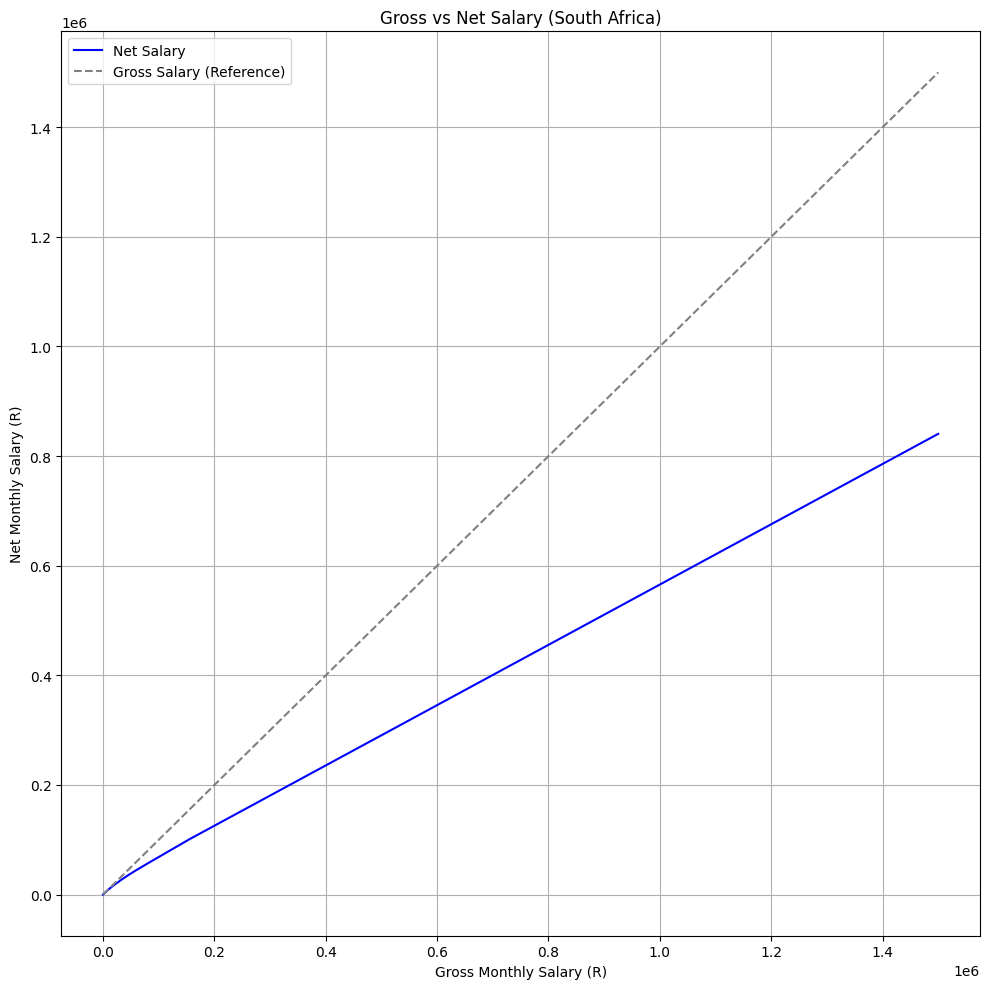

In [1]:
import numpy as np
import matplotlib.pyplot as plt

TAX_BRACKETS = [
    (237_100, 0.18),
    (370_500, 0.26),
    (512_800, 0.31),
    (673_000, 0.36),
    (857_900, 0.39),
    (1_817_000, 0.41),
    (None, 0.45), 
]

PRIMARY_REBATE = 17_235
UIF_MONTHLY_CEILING = 17_712

# Salary calculator
def calculate_net(gross_monthly):
    uif = min(gross_monthly, UIF_MONTHLY_CEILING) * 0.01
    annual_gross = gross_monthly * 12
    tax = 0.0
    lower = 0.0

    for upper, rate in TAX_BRACKETS:
        if upper is None:  # top bracket
            slice_amt = max(0.0, annual_gross - lower)
            tax += slice_amt * rate
            break
        slice_amt = max(0.0, min(annual_gross, upper) - lower)
        tax += slice_amt * rate
        if annual_gross <= upper:
            break
        lower = upper

    annual_paye = max(0.0, tax - max(0.0, PRIMARY_REBATE))
    paye_monthly = annual_paye / 12
    net_monthly = gross_monthly - uif - paye_monthly
    return net_monthly

gross_salaries = np.linspace(0, 1_500_000, 300)
net_salaries = [calculate_net(g) for g in gross_salaries]

plt.figure(figsize=(10, 10))
plt.plot(gross_salaries, net_salaries, label="Net Salary", color="blue")
plt.plot(gross_salaries, gross_salaries, "--", label="Gross Salary (Reference)", color="gray")
plt.xlabel("Gross Monthly Salary (R)")
plt.ylabel("Net Monthly Salary (R)")
plt.title("Gross vs Net Salary (South Africa)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


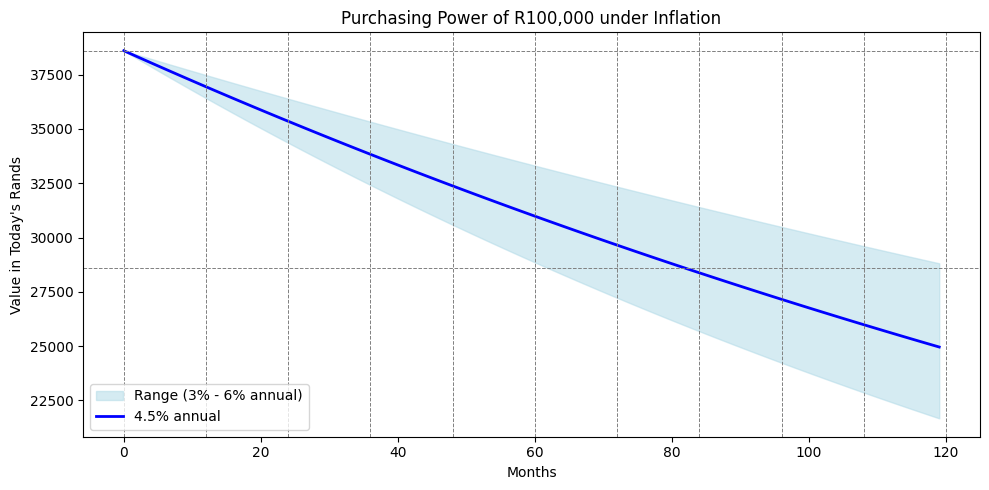

In [2]:
base_value = 38600
years = 10

mil, mim, mih = 0.00246, 0.00367, 0.00486 
months = 12 * years

low = [base_value/(1+mil)**m for m in range(months)]
mid = [base_value/(1+mim)**m for m in range(months)]
high = [base_value/(1+mih)**m for m in range(months)]

plt.figure(figsize=(10, 5))
plt.fill_between(range(months), low, high, color="lightblue", alpha=0.5, label="Range (3% - 6% annual)")
plt.plot(mid, color="blue", linewidth=2, label="4.5% annual")

ymin, ymax = plt.ylim()
for y in range(base_value, int(ymin), -10_000):
    plt.axhline(y=y, color="gray", linestyle="--", linewidth=0.7)
xmin, xmax = plt.xlim()
for x in range(0, int(xmax)+1, 12):
    plt.axvline(x=x, color="gray", linestyle="--", linewidth=0.7)

plt.legend()
plt.title("Purchasing Power of R100,000 under Inflation")
plt.xlabel("Months")
plt.ylabel("Value in Today's Rands")
plt.tight_layout()
plt.show()


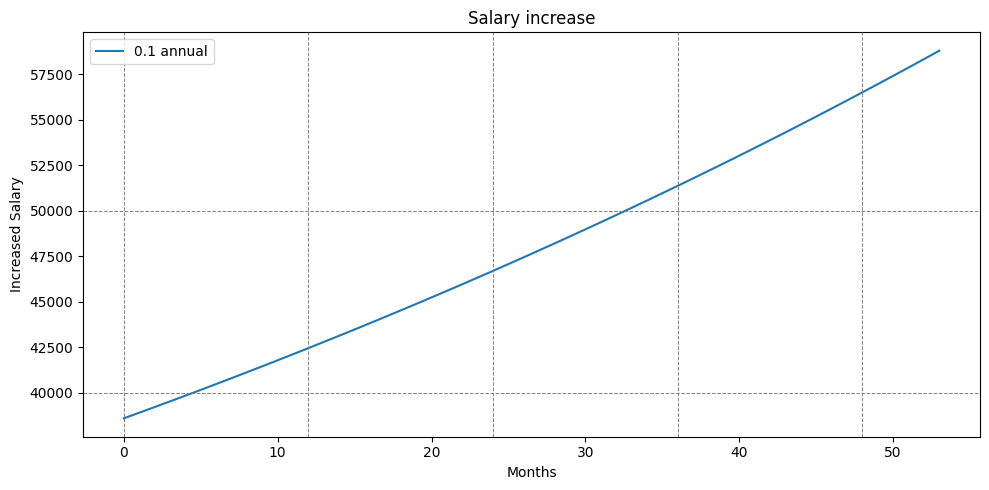

In [40]:
base_value = 38600

yil, yim, yih = 0.05, 0.1, 0.25
def year_to_month(percentage):
    return (1+percentage)**(1/12) - 1
mil, mim, mih = [year_to_month(p) for p in (yil, yim, yih)]

years = 4.5
months = round(12 * years)

mid = [base_value*(1+mim)**m for m in range(months)]

plt.figure(figsize=(10, 5))
plt.plot(mid, label=f"{yim} annual")

ymin, ymax = plt.ylim()
for y in range(round(base_value,-4), int(ymax), 10_000):
    plt.axhline(y=y, color="gray", linestyle="--", linewidth=0.7)
xmin, xmax = plt.xlim()
for x in range(0, int(xmax)+1, 12):
    plt.axvline(x=x, color="gray", linestyle="--", linewidth=0.7)

plt.legend()
plt.title("Salary increase")
plt.xlabel("Months")
plt.ylabel("Increased Salary")
plt.tight_layout()
plt.show()

# Let's start combining

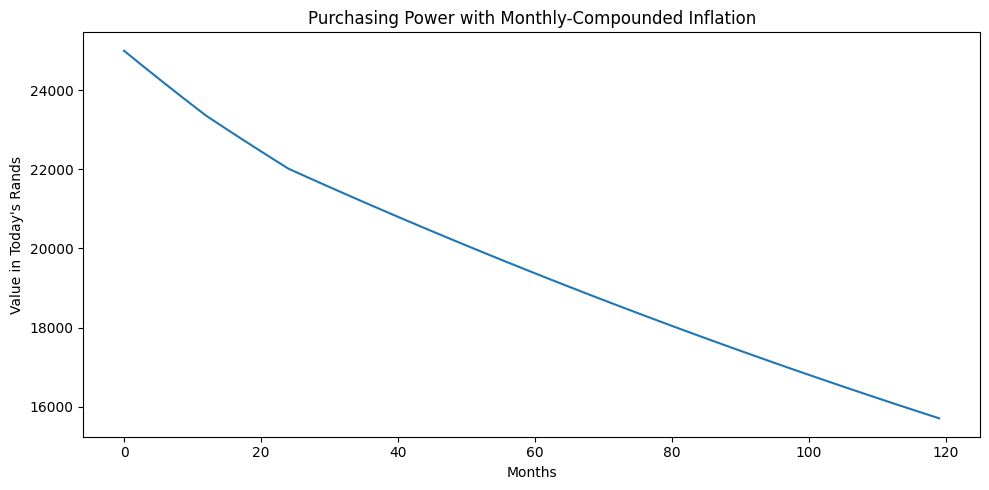

In [43]:
import numpy as np
import matplotlib.pyplot as plt

base_value = 25000
years = 10
months = 12 * years

inflations = [
    (12, 7.04),  # months, annual %
    (12, 6.08),
    (12, 4.36),
]

def year_to_month(percentage_annual):
    return (1 + percentage_annual/100.0)**(1/12.0) - 1

monthly_rates = np.zeros(months, dtype=float)
i = 0
for mons, annual_pct in inflations:
    r = year_to_month(annual_pct)
    j = min(i + mons, months)
    monthly_rates[i:j] = r
    i = j
if i < months:
    monthly_rates[i:] = monthly_rates[i-1] if i > 0 else 0.0


rates_for_prod = np.concatenate(([0.0], monthly_rates[:-1]))
values = base_value * np.cumprod(1.0 / (1.0 + rates_for_prod))


plt.figure(figsize=(10, 5))
plt.plot(values)

plt.title("Purchasing Power with Monthly-Compounded Inflation")
plt.xlabel("Months")
plt.ylabel("Value in Today's Rands")
plt.tight_layout()
plt.show()


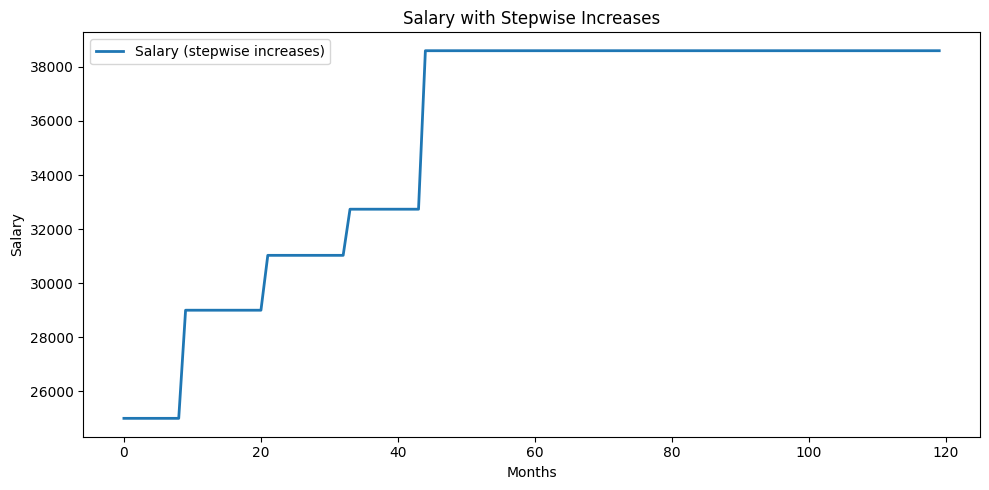

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

base_value = 25000
years = 10
months = 12 * years

increases = [
    (9, 16),
    (12, 7),
    (12, 5.5),
    (11, 17.91),
]

factors = np.ones(months, dtype=float)

boundary = 0
for mons, pct in increases:
    boundary += mons
    if boundary < months:           
        factors[boundary] *= (1 + pct / 100.0)

salary = base_value * np.cumprod(factors)

plt.figure(figsize=(10, 5))
plt.plot(salary, linewidth=2, label="Salary (stepwise increases)")


plt.title("Salary with Stepwise Increases")
plt.xlabel("Months")
plt.ylabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()


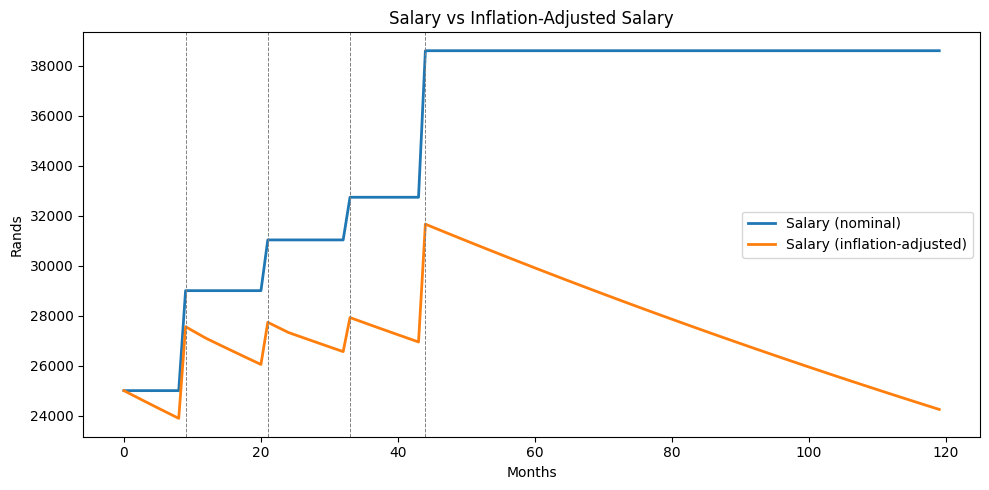

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Inputs ----------------
base_salary = 25000
years = 10
months = 12 * years

# (months_until_increase, percent_increase)
increases = [
    (9, 16),
    (12, 7),
    (12, 5.5),
    (11, 17.91),
]

# (months_covered, annual_inflation_%)
inflations = [
    (12, 7.04),
    (12, 6.08),
    (12, 4.36),
]

# --------------- Nominal salary (jagged) ---------------
factors = np.ones(months, dtype=float)
boundary = 0
for mons, pct in increases:
    boundary += mons
    if boundary < months:
        factors[boundary] *= (1 + pct / 100.0)

salary_nominal = base_salary * np.cumprod(factors)

# --------------- Inflation deflator (smooth monthly) ---------------
def year_to_month(annual_pct):
    return (1 + annual_pct/100.0)**(1/12.0) - 1

monthly_rates = np.zeros(months, dtype=float)
i = 0
for mons, annual_pct in inflations:
    r = year_to_month(annual_pct)
    j = min(i + mons, months)
    monthly_rates[i:j] = r
    i = j
# Extend last rate if schedule shorter than horizon
if i < months:
    monthly_rates[i:] = monthly_rates[i-1] if i > 0 else 0.0

# Deflator index starts at 1.0 (month 0 is "today's rands")
rates_for_prod = np.concatenate(([0.0], monthly_rates[:-1]))
deflator = np.cumprod(1.0 / (1.0 + rates_for_prod))

# --------------- Real salary (in today's rands) ---------------
salary_real = salary_nominal * deflator

# --------------- Plot ---------------
plt.figure(figsize=(10, 5))
plt.plot(salary_nominal, linewidth=2, label="Salary (nominal)")
plt.plot(salary_real, linewidth=2, label="Salary (inflation-adjusted)")

boundary = 0
for mons, _ in increases:
    boundary += mons
    if boundary < months:
        plt.axvline(boundary, color="gray", linestyle="--", linewidth=0.7)

plt.title("Salary vs Inflation-Adjusted Salary")
plt.xlabel("Months")
plt.ylabel("Rands")
plt.legend()
plt.tight_layout()
plt.show()
